## 1) Begin Milestone 1 with a 250-500-word narrative describing an original idea for an analysis/model building business problem. 

I work in Research & Development for a company that makes animal vaccines. My job is, in part, to scale up the process from benchtop / lab scale to full production / manufacturing scale. For the past few years, I have been working on a particular microorganism that has proved to be finicky and not always predictable and, while they can be overlapped, each batch takes about 2 months, start to finish.   

Through a series of setbacks, I have now produced 12 batches between 2019 and I would like to see if I can find any insights in my data that might be helpful in maximizing the final yield, as quantified by ELISA testing for the target antigen.   

The scale up initially involves roller bottles and flasks in the clean lab, then goes through several vessels, ultimately finishing in a 1000 liter SUB (single-use bioreactor). The majority of my data comes from sampling the vessels at different timepoints, usually more spaced out early in each vessel, then daily as we hit log-phase growth and get ready to transfer to the next vessel. Because sampling isn’t always daily, there are a lot of days that we will have missing data. Results from daily sampling are used not just do determine optimal harvest time, but also day of passage from one vessel to the next. Ideally we would like to transfer during mid-to-late log-phase growth and have lots of actively infected cells (intracellular), but before we hit the lag phase, which can slow down growth and result in delays in the following vessel.   

In addition to optimizing yield, there is another issue we’re trying to solve in that we currently use a piece of analytical equipment (MPbio_TotCt in the data) which correlates nicely with our ELISA results, which is helpful in determining when to harvest our final vessel. This equipment is no longer supported by the vendor and so we need to find a replacement. For several of these recent runs, we have been pulling additional samples to try out different analytical methods and equipment that correlates, hopefully with the old equipment, and preferably with the ELISA results.   

I should also note that we do pull in-process samples from our final vessel for ELISA testing, but the ELISA is a longer (overnight) test and we need a much faster method for in-process testing. For reference, the analytical equipment we are replacing could provide a result in just a couple of hours.

## 2) Then, do a graphical analysis creating a minimum of four graphs.
Label your graphs appropriately and explain/analyze the information provided by each graph. Keep in mind that your analysis may look very different from the Titanic tutorial graphical analysis.

### Load and clean up the data

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data to a DataFrame
vessel_data = pd.read_excel('Compiled_Lawsonia.xlsx')

In [3]:
# Check the dimensions of the table
print(f"The table is {vessel_data.shape[0]} rows x {vessel_data.shape[1]} columns.")

The table is 465 rows x 39 columns.


In [4]:
# Get an initial look at the data
vessel_data.head()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3,2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,369697PV,5L BLU,M,2019-07-12,09:25:00,36.0,40.0,7.37,7.035,6.783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0,2019-07-12,10:53:00,35.8,40.0,15.39,6.983,7.118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,369697PV,5L BLU,1,2019-07-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369697PV,5L BLU,2,2019-07-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of NaNs that will need to be dealt with.  
DPI is days post inoculation and that column contains several 'M's, which are just the media, prior to inoculation, and can also be removed.

In [5]:
# Remove rows from 'DPI' column which are 'M'
vessel_data = vessel_data[vessel_data.DPI!='M']

In [6]:
# Check each column for NaNs
pd.isnull(vessel_data).any()

Batch             False
Vessel            False
DPI                True
Date               True
Time               True
Temp_C             True
Agitation          True
DO_pct             True
pH_online          True
pH_offline         True
O₂_%sat            True
CO₂_%sat           True
L_Glut             True
Gluc               True
Lact               True
Ammon              True
Nuc_NonVi          True
Nuc_TotCt          True
Nuc_LiveCt         True
Nuc_Viab           True
MPbio_Blank        True
MPbio_Area         True
MPbio_TotCt        True
MPtvo_Blank        True
MPtvo_Area         True
MPtvo_TotCt        True
Intra_Ct           True
Micro_Intra        True
Micro_Extra        True
Micro_Comments     True
Intra_Code         True
Extra_Code         True
ELISA_KZO          True
ELISA_LNK          True
Live_Titer         True
VCD_OD             True
RNA                True
gDNA/1mL           True
Antifoam           True
dtype: bool

DPI shouldn't have any null values.

In [7]:
# Remove rows from 'DPI' which are NaN
vessel_data = vessel_data[vessel_data['DPI'].notnull()]

In [8]:
# Check the types of data
vessel_data.dtypes

Batch                     object
Vessel                    object
DPI                       object
Date              datetime64[ns]
Time                      object
Temp_C                   float64
Agitation                float64
DO_pct                   float64
pH_online                float64
pH_offline               float64
O₂_%sat                  float64
CO₂_%sat                 float64
L_Glut                   float64
Gluc                     float64
Lact                     float64
Ammon                    float64
Nuc_NonVi                 object
Nuc_TotCt                float64
Nuc_LiveCt               float64
Nuc_Viab                 float64
MPbio_Blank              float64
MPbio_Area               float64
MPbio_TotCt              float64
MPtvo_Blank              float64
MPtvo_Area               float64
MPtvo_TotCt              float64
Intra_Ct                 float64
Micro_Intra               object
Micro_Extra               object
Micro_Comments            object
Intra_Code

Now that we romoved 'M' from the 'DPI' column the variable should be numeric, so we'll convert to integers.

In [9]:
# Convert 'DPI' column to numeric
vessel_data['DPI'] = vessel_data['DPI'].astype(int)

The 'Nuc_NonVi' should be numeric and I know what the issue is: there is a lower limit of detection of 5000 on that piece of equipment and if the value falls below that, we record as '<5k'. I will replace all of these with 2500 (half the lower limit).

In [10]:
# Replace '<5k' in 'Nuc_NonVi' column with 1/2 lower limit
vessel_data.Nuc_NonVi = vessel_data.Nuc_NonVi.replace('<5k', 5000/2)

The 'Micro_Intra' and 'Micro_Extra' are ordered categorical descriptions used when looking at the organism under the microscope. These are standardized, so I will create new columns 'Extra_Coded' and 'Intra_Coded' to code them into numeric values.

In [11]:
# Check the standard descriptions for microscopy
print(vessel_data.Micro_Intra.unique())
print(vessel_data.Micro_Extra.unique())

[nan 'Light, 1+' 'Some, 2+' 'Heavy, 3+' 'Very Light, <1+' 'Very Heavy, 4+']
[nan 'Some, 2+' 'Heavy, 3+' 'Very Heavy, 4+' 'Light, 1+' 'Very Light, <1+'
 'Heavy, 3+ ']


'Micro_Extra' appears to have an extra space in at least one of the fields, which will need to be stripped first.

In [12]:
# Strip whitespace from 'Micro_Extra' column
vessel_data['Micro_Extra'] = vessel_data.Micro_Extra.str.strip()

In [13]:
# Map values to new columns based on descriptions
dict = {'Very Light, <1+': 1, 'Light, 1+': 2, 'Some, 2+': 3, 'Heavy, 3+': 4, 'Very Heavy, 4+': 5}
vessel_data['Intra_Code'] = vessel_data['Micro_Intra'].map(dict)
vessel_data['Extra_Code'] = vessel_data['Micro_Extra'].map(dict)

The 'VCD_OD' column has data for a probe that I used on two runs, but was not working correctly for one of the runs and provided inaccurate data, which will need to be removed.

In [14]:
# Remove inaccurate data
vessel_data.loc[(vessel_data.Batch == '471341PV'), 'VCD_OD'] = np.nan

Many of the NaN values in the data set are days with no sampling and those can be removed completely. 

In [15]:
print(f"{vessel_data.shape[0]} rows before removing non-sampling days.")

422 rows before removing non-sampling days.


In [16]:
# Remove rows that contain no data beyond the batch/vessel identifiers and day/date/time info
colList = vessel_data.columns[5:]
vessel_data.dropna(axis=0, subset=colList, how="all", inplace=True)

In [17]:
print(f"{vessel_data.shape[0]} rows after removing non-sampling days.")

352 rows after removing non-sampling days.


### Take another look at the data

In [18]:
vessel_data.head()

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
0,369697PV,Flasks,3,2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,369697PV,5L BLU,0,2019-07-12,10:53:00,35.8,40.0,15.39,6.983,7.118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,369697PV,5L BLU,4,2019-07-16,08:47:00,36.0,40.0,6.14,7.038,6.978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,369697PV,5L BLU,7,2019-07-19,08:35:00,36.0,40.0,5.77,7.028,6.947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,369697PV,50L BLU,0,2019-07-19,09:00:00,36.0,42.0,6.26,7.034,7.003,...,None,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print("Describe Data:")

Describe Data:


In [20]:
print("\tColumns 1-11:")
vessel_data.describe().iloc[:,:11]

	Columns 1-11:


,DPI,Temp_C,Agitation,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,Lact
count,352.000000,339.000000,339.000000,339.000000,339.000000,262.000000,241.000000,246.000000,195.000000,249.000000,216.000000
mean,5.315341,35.986667,49.731711,6.416254,7.046743,7.052683,1.327440,0.082272,0.877846,3.892048,0.256074
std,3.858611,0.110077,10.182909,3.231918,0.042150,0.094749,9.046905,0.127859,0.846720,0.696477,0.278071
min,0.000000,34.780000,40.000000,0.160000,6.610000,6.658000,0.034000,0.008000,0.000000,1.080000,0.000000
25%,2.000000,36.000000,42.000000,5.590000,7.050000,7.006000,0.377000,0.055000,0.050000,3.600000,0.090000
50%,5.000000,36.000000,48.900000,5.980000,7.050000,7.050500,0.475000,0.073000,0.660000,4.120000,0.185979
75%,8.000000,36.000000,49.200000,6.300000,7.060000,7.091000,0.614000,0.089000,1.515000,4.390000,0.310000
max,15.000000,36.400000,67.300000,41.740000,7.140000,7.525000,100.000000,1.900000,3.270000,4.900000,1.760000


In [21]:
print("\tColumns 12-22:")
vessel_data.describe().iloc[:,11:22]

	Columns 12-22:


,Ammon,Nuc_NonVi,Nuc_TotCt,Nuc_LiveCt,Nuc_Viab,MPbio_Blank,MPbio_Area,MPbio_TotCt,MPtvo_Blank,MPtvo_Area,MPtvo_TotCt
count,226.000000,269.000000,2.690000e+02,2.690000e+02,269.000000,240.000000,2.400000e+02,2.410000e+02,240.000000,240.000000,2.410000e+02
mean,1.924248,29711.895911,5.642305e+05,5.335465e+05,0.946986,1105.387500,4.740820e+05,1.207705e+08,289.845833,153250.683333,7.745817e+07
std,1.160151,42916.459196,4.361427e+05,4.072878e+05,0.050340,1404.196599,3.759511e+05,9.880619e+07,1363.298865,154588.907064,6.032180e+08
min,0.280000,2500.000000,1.500000e+04,1.000000e+04,0.561905,21.000000,2.790000e+03,6.690000e+05,0.000000,917.000000,2.190000e+05
25%,0.962500,2500.000000,1.890000e+05,1.840000e+05,0.928244,348.500000,1.376765e+05,3.430000e+07,11.000000,39264.000000,9.741250e+06
50%,1.800000,8000.000000,4.230000e+05,4.130000e+05,0.962121,568.000000,4.228810e+05,1.054670e+08,32.000000,113248.000000,2.940000e+07
75%,2.850000,42000.000000,8.550000e+05,8.230000e+05,0.980769,1111.000000,7.553715e+05,2.018952e+08,53.000000,200863.750000,5.370000e+07
max,5.930000,212000.000000,1.880000e+06,1.835000e+06,0.994111,7275.000000,1.400818e+06,3.940000e+08,16757.000000,716160.000000,9.384000e+09


In [22]:
print("\tColumns 23-32:")
vessel_data.describe().iloc[:,22:33]

	Columns 23-32:


,Intra_Ct,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
count,76.000000,247.000000,247.000000,82.000000,21.000000,5.000000,11.000000,47.000000,5.600000e+01,7.0
mean,15.894737,2.655870,3.890688,9263.341463,6926.571429,4.530000,1.521818,15827.859284,1.960579e+08,1.0
std,23.289242,1.054894,1.179170,3295.625088,2853.117638,0.710282,0.925406,22378.752738,1.507412e+08,0.0
min,0.000000,1.000000,1.000000,1630.000000,3156.000000,3.500000,0.050000,170.000000,2.545546e+06,1.0
25%,2.750000,2.000000,3.000000,6617.250000,4889.000000,4.500000,0.765000,1478.957764,7.661384e+07,1.0
50%,7.500000,3.000000,4.000000,9670.250000,5549.000000,4.500000,1.560000,7378.627930,1.359994e+08,1.0
75%,20.000000,3.000000,5.000000,11124.500000,9758.000000,4.650000,2.355000,23748.478516,2.879057e+08,1.0
max,127.000000,5.000000,5.000000,17020.000000,11965.000000,5.500000,2.580000,103762.656250,6.374318e+08,1.0


In [23]:
print("Summarized Data:")
vessel_data.describe(include=['O'])

Summarized Data:


,Batch,Vessel,Time,Micro_Intra,Micro_Extra,Micro_Comments
count,352,352,341,247,247,248
unique,12,5,162,5,5,23
top,381550PV,1000L SUB,09:00:00,"Some, 2+","Very Heavy, 4+",None
freq,38,109,7,97,105,225


During visualization, I noticed a large outlier in the Total Viable Organisms ('MPtvo_TotCt'). The value for one of the results was recorded as 8.384e9 and should have been 8.84e6:

Text(0.5, 1.0, 'TVO Over Time')

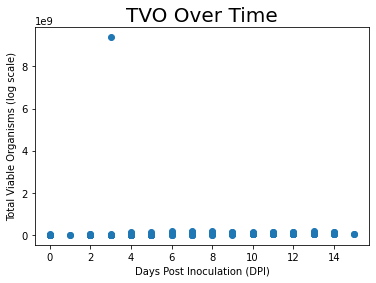

In [24]:
x = vessel_data.DPI
y = vessel_data.MPtvo_TotCt
plt.scatter(x, y)
plt.xlabel("Days Post Inoculation (DPI)")
plt.ylabel("Total Viable Organisms (log scale)")
plt.title("TVO Over Time", fontsize=20)

In [25]:
vessel_data[vessel_data.MPtvo_TotCt>8e9]

,Batch,Vessel,DPI,Date,Time,Temp_C,Agitation,DO_pct,pH_online,pH_offline,...,Micro_Comments,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
179,457597PV,50L BLU,3,2020-08-17,09:25:00,36.0,42.0,5.59,7.05,6.983,...,None,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
vessel_data.loc[179, 'MPtvo_TotCt'] = 9.84e6

### Think about the data

* **ELISA** results will be the target variable. There are two columns for this because testing was sometimes performed at two locations, for comparison. The 'ELISA_KZO' variable was used consistently throughout and so 'ELISA_LNK' is not needed.  
* Many of the results from the daily sampling are either nutrients that are consumed during growth (L-Glut, Gluc) or are by-products of growth (Lact, Ammon). While these correspond with growth kinetics, they may not be good indicators as passage or harvest criteria.  
* I plan to look for correlations of the target 'ELISA_KZO' variable with different analytical methods as well as correlations with the 'MPbio_TotCt' variable to find a viable replacement for the analytical method.  
* I would also like to split the batches based on the final ELISA result into "good" and "bad" runs to see if I can find any differences that might explain why some are better than others.

In [27]:
# Look for correlations 
corrDF = vessel_data.corr()
corrDF

,DPI,Temp_C,Agitation,DO_pct,pH_online,pH_offline,O₂_%sat,CO₂_%sat,L_Glut,Gluc,...,Intra_Ct,Intra_Code,Extra_Code,ELISA_KZO,ELISA_LNK,Live_Titer,VCD_OD,RNA,gDNA/1mL,Antifoam
DPI,1.000000,0.100553,0.016790,-0.275326,-0.163296,-0.112365,-0.063865,-0.101220,-0.785802,-0.708295,...,0.288664,0.505777,0.829476,0.617539,0.337400,0.619671,0.958727,-0.123444,0.702237,NaN
Temp_C,0.100553,1.000000,-0.021115,-0.192914,-0.020775,0.030124,0.086086,0.080981,-0.019335,-0.065916,...,0.084120,0.081274,0.177272,0.073257,0.213345,0.810647,-0.364863,0.130016,0.164139,NaN
Agitation,0.016790,-0.021115,1.000000,-0.234914,0.205581,0.244603,0.228620,-0.050011,-0.084685,0.019647,...,-0.166989,-0.053710,0.117080,-0.037613,0.213592,-0.763425,-0.360764,-0.089946,-0.269026,NaN
DO_pct,-0.275326,-0.192914,-0.234914,1.000000,0.105738,0.040839,0.001469,0.114967,0.299281,0.203165,...,-0.036068,-0.143880,-0.382579,0.073006,0.220922,-0.857695,-0.644800,0.013532,-0.149384,NaN
pH_online,-0.163296,-0.020775,0.205581,0.105738,1.000000,0.500569,0.044728,0.281500,0.088232,0.384183,...,0.004538,-0.060772,-0.129673,0.114055,0.178015,-0.873483,-0.769757,0.085701,-0.496685,NaN
pH_offline,-0.112365,0.030124,0.244603,0.040839,0.500569,1.000000,0.397026,0.317669,0.062938,0.241264,...,-0.158694,-0.131722,-0.162685,0.028297,0.351691,-0.701654,-0.753275,0.030460,-0.593829,NaN
O₂_%sat,-0.063865,0.086086,0.228620,0.001469,0.044728,0.397026,1.000000,0.900190,-0.079755,0.018089,...,0.127375,-0.142562,-0.189104,-0.153240,-0.215291,0.060228,-0.407834,0.022853,-0.007434,NaN
CO₂_%sat,-0.101220,0.080981,-0.050011,0.114967,0.281500,0.317669,0.900190,1.000000,-0.055923,0.098207,...,0.342571,-0.124757,-0.196744,-0.111561,-0.126113,-0.722276,-0.633033,0.139728,-0.008124,NaN
L_Glut,-0.785802,-0.019335,-0.084685,0.299281,0.088232,0.062938,-0.079755,-0.055923,1.000000,0.473042,...,-0.377039,-0.454554,-0.680830,-0.417699,NaN,NaN,-1.000000,-0.115538,-0.815734,NaN
Gluc,-0.708295,-0.065916,0.019647,0.203165,0.384183,0.241264,0.018089,0.098207,0.473042,1.000000,...,-0.156796,-0.353557,-0.587348,-0.251983,-0.433567,-0.459863,-0.745869,0.129989,-0.671177,NaN


There are too many correlations to look through, so I will look specifically at the variables of interest:

In [28]:
# Variables with ELISA_KZO correlation >0.5 (positive or negative)
vessel_data.corrwith(vessel_data.ELISA_KZO)[abs(vessel_data.corrwith(vessel_data.ELISA_KZO)) > 0.5].sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


ELISA_KZO      1.000000
ELISA_LNK      0.963900
VCD_OD         0.822339
MPbio_Area     0.746802
MPbio_TotCt    0.746065
Live_Titer     0.620955
DPI            0.617539
Intra_Ct      -0.678686
gDNA/1mL      -0.805817
dtype: float64

In [29]:
# Variables with MPbio_TotCt correlation >0.5 (positive or negative)
vessel_data.corrwith(vessel_data.MPbio_TotCt)[abs(vessel_data.corrwith(vessel_data.MPbio_TotCt)) > 0.5].sort_values(ascending=False)

MPbio_TotCt    1.000000
MPbio_Area     0.972173
VCD_OD         0.956162
ELISA_LNK      0.888229
Ammon          0.876583
DPI            0.858668
gDNA/1mL       0.851490
Extra_Code     0.798078
Nuc_NonVi      0.763418
Nuc_TotCt      0.746729
ELISA_KZO      0.746065
Nuc_LiveCt     0.720506
MPtvo_TotCt    0.694934
Live_Titer     0.682768
MPtvo_Area     0.663341
Intra_Code     0.541130
L_Glut        -0.688426
Gluc          -0.691065
dtype: float64

We've already determined that the ELISA_LNK variable is redundant and I know the MBbio_Area is used to calculate MPbio_TotCt, so it won't provide any additional information. I'll add the rest of the variables to a list for comparison. 

In [30]:
num_features = ['DPI', 'L_Glut', 'Gluc', 'Ammon', 'Nuc_NonVi', 'Nuc_TotCt', 
                'Nuc_LiveCt', 'MPbio_TotCt', 'MPtvo_TotCt', 'Intra_Ct', 
                'Intra_Code', 'Extra_Code', 'ELISA_KZO', 'Live_Titer', 
                'VCD_OD', 'RNA', 'gDNA/1mL']

### Visualize Data

In [31]:
from yellowbrick.features import Rank2D

In [32]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [33]:
# Generate list of num type columns:
colsTypes = list(zip(vessel_data.columns, vessel_data.dtypes))
num_features = []
for col, typ in colsTypes:
    if typ == 'float64':
        num_features.append(col)

#### Pearson Ranking

In [34]:
# Most features are missing some data, which doesn't work with the Pearson
# calculation. Remove NaN's from some of the variables of interest
pearsDF = vessel_data.copy()
pearsDF = pearsDF[pearsDF.ELISA_KZO.notnull()]
pearsDF = pearsDF[pearsDF.MPbio_TotCt.notnull()]
pearsDF = pearsDF[pearsDF.Extra_Code.notnull()]
pearsDF = pearsDF[pearsDF.Nuc_NonVi.notnull()]
# See how much data is left
pearsDF.shape

(74, 39)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


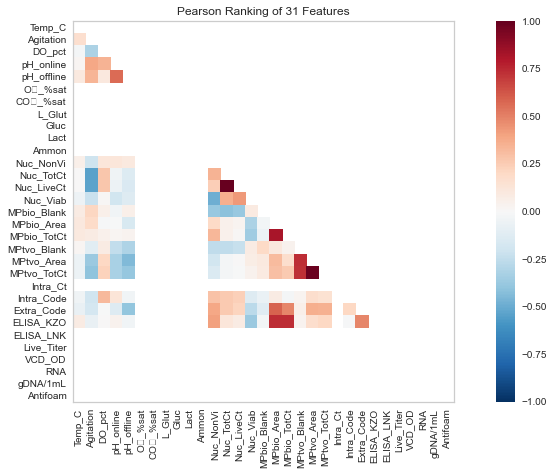

<AxesSubplot:title={'center':'Pearson Ranking of 31 Features'}>

In [35]:
X = pearsDF[num_features].values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson') # ‘pearson’, ‘covariance’, ‘spearman’, or ‘kendalltau’
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof()#outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

In [36]:
# Remove blank columns from Pearson ranking chart
num_features = ['Temp_C', 'Agitation', 'DO_pct', 'pH_online', 'pH_offline', 
                'Nuc_NonVi', 'Nuc_TotCt', 'Nuc_LiveCt', 'Nuc_Viab', 
                'MPbio_Blank', 'MPbio_Area', 'MPbio_TotCt', 'MPtvo_Blank', 
                'MPtvo_Area', 'MPtvo_TotCt', 'Intra_Code', 'Extra_Code', 'ELISA_KZO',]

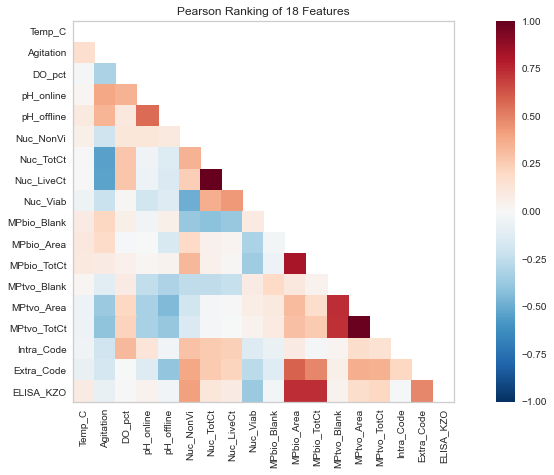

<AxesSubplot:title={'center':'Pearson Ranking of 18 Features'}>

In [37]:
X = pearsDF[num_features].values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson') # ‘pearson’, ‘covariance’, ‘spearman’, or ‘kendalltau’
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof()#outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

We can see that MP numbers appear to correlate with each other. This is expected because they are all different parts of the results from the same instrument. Just looking at ELISA results we confirm the correlation with MP results, and we also see a slight correlation with both the Extra_Code (from microscopy) and the Nuc_NonVi.  
These make sense because when the infected cells lyse and release the bacteria, we will see the extracellular numbers increase and the overall cell viability go down. Related to this, we can also see a slight negative correlation with Nuc_Viab, which is the percent viability of the cells.

## 3) Write a short overview/conclusion of the insights gained from your graphical analysis.